In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

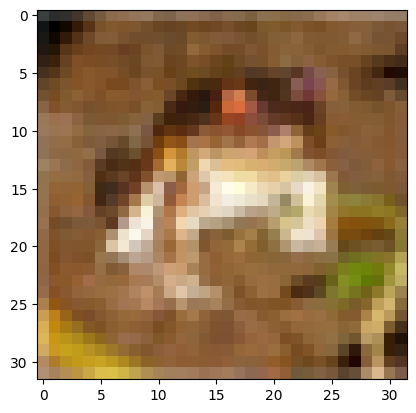

In [6]:
# FROG
plt.imshow(x_train[0])

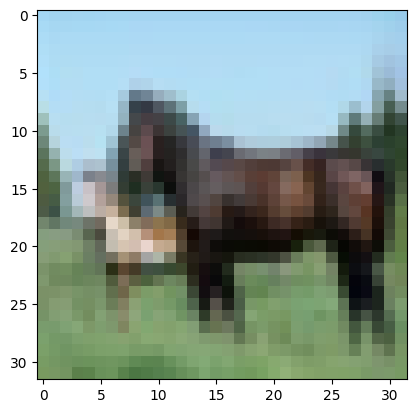

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15


1563/1563 [==============================] - 27s 16ms/step - loss: 1.5425 - accuracy: 0.4435 - val_loss: 1.2852 - val_accuracy: 0.5328
Epoch 2/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1816 - accuracy: 0.5858 - val_loss: 1.2121 - val_accuracy: 0.5718
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0144 - accuracy: 0.6478 - val_loss: 1.1049 - val_accuracy: 0.6091
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8971 - accuracy: 0.6895 - val_loss: 0.9571 - val_accuracy: 0.6716
Epoch 5/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8032 - accuracy: 0.7233 - val_loss: 1.1826 - val_accuracy: 0.5980
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7265 - accuracy: 0.7512 - val_loss: 1.3177 - val_accuracy: 0.6007
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6616 - accuracy: 0.7721 - val_loss: 0.9474

In [28]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.542502,0.44350,1.285250,0.5328
1,1.181557,0.58576,1.212056,0.5718
2,1.014352,0.64780,1.104930,0.6091
3,0.897150,0.68952,0.957104,0.6716
4,0.803196,0.72328,1.182623,0.5980


<Axes: >

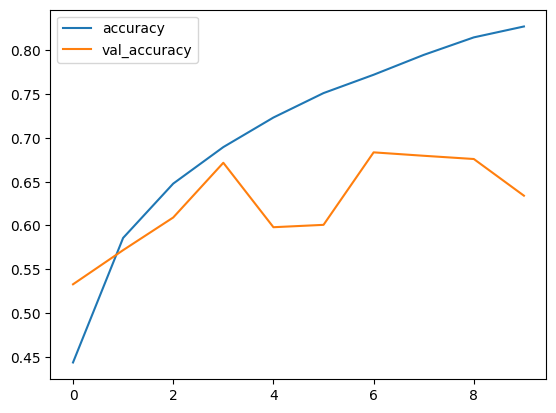

In [31]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

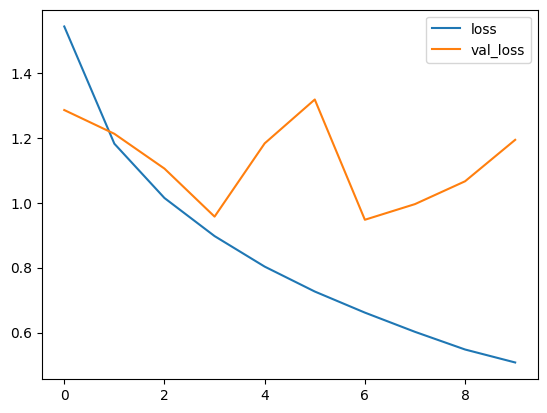

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1935101747512817, 0.6340000033378601]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

# predictions = model.predict_classes(x_test)
predictions = model.predict(x_test).argmax(axis=1) 

313/313 [==============================] - 1s 4ms/step


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1000
           1       0.81      0.76      0.78      1000
           2       0.74      0.40      0.52      1000
           3       0.35      0.67      0.46      1000
           4       0.60      0.61      0.60      1000
           5       0.64      0.41      0.50      1000
           6       0.71      0.74      0.72      1000
           7       0.56      0.82      0.67      1000
           8       0.83      0.61      0.70      1000
           9       0.84      0.63      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.68      0.63      0.64     10000
weighted avg       0.68      0.63      0.64     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[689,  26,  24,  79,  49,   9,  13,  39,  53,  19],
       [ 11, 756,   6,  62,  16,   9,  28,  30,  21,  61],
       [ 58,   7, 404, 179, 110,  51,  71, 107,  10,   3],
       [ 20,   3,  21, 665,  62,  83,  62,  72,   4,   8],
       [ 13,   3,  24, 124, 613,  22,  51, 143,   7,   0],
       [ 11,   7,  14, 339,  51, 413,  19, 144,   1,   1],
       [  7,   1,  15, 167,  39,  13, 736,  21,   0,   1],
       [  8,   4,   1,  87,  41,  26,   7, 820,   2,   4],
       [109,  29,  21, 115,  33,  14,  20,  29, 610,  20],
       [ 37,  92,  18,  94,  14,  10,  27,  51,  23, 634]], dtype=int64)

<Axes: >

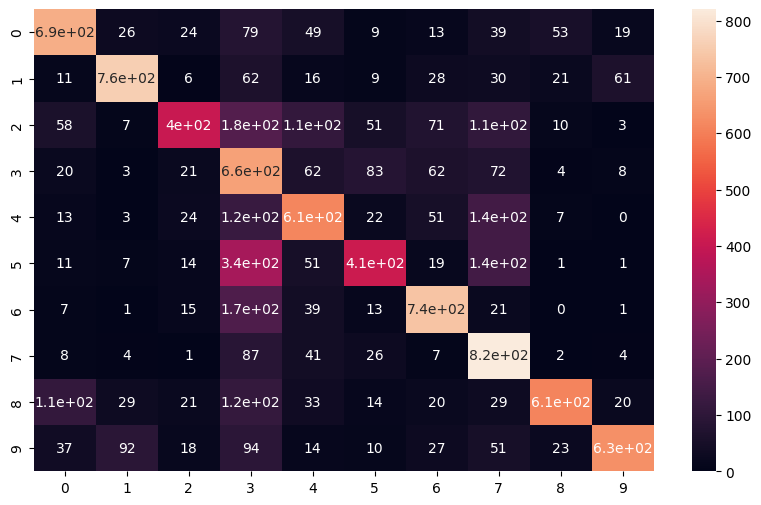

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [39]:
my_image = x_test[16]

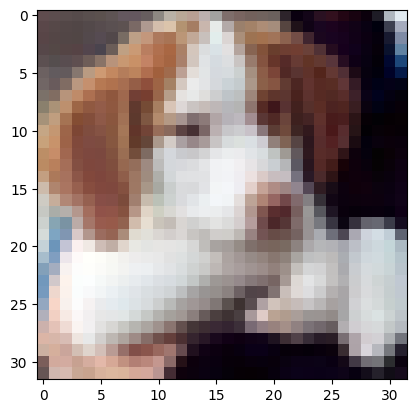

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)
# model.predict_classes(my_image.reshape(1,32,32,3))
model.predict(my_image.reshape(1,32,32,3)).argmax(axis=1) 

1/1 [==============================] - 0s 31ms/step


array([3], dtype=int64)

In [42]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html